In [129]:

%pylab inline
import scipy
from scipy import misc #Miscelanea
from scipy import ndimage # Librería Imágenes
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist', 'gray', 'angle', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
face = misc.face() # Traer una imagen para hacer pruebas
print(face) # Matriz de intensidad de los colores en RGB
##(cada columna representa que tan intenso es el pixel en rojo, verde y azul)
print(face.shape, face.dtype) # Características de la matriz (uint-8 = enteros de 8 bits)

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ..., 
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ..., 
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ..., 
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ..., 
 [[ 87 106  76]
  [ 94 110  81]
  [107 124  92]
  ..., 
  [120 158  97]
  [119 157  96]
  [119 158  95]]

 [[ 85 101  72]
  [ 95 111  82]
  [112 127  96]
  ..., 
  [121 157  96]
  [120 156  94]
  [120 156  94]]

 [[ 85 101  74]
  [ 97 113  84]
  [111 126  97]
  ..., 
  [120 156  95]
  [119 155  93]
  [118 154  92]]]
(768, 1024, 3) uint8


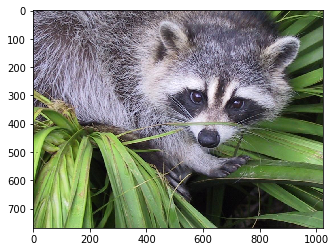

In [5]:
plt.imshow(face) # Cada uno de los pixeles tiene 3 valores correspondientes a los valores principales
# Muestra la imagen en una malla que muesta los pixeles en x y y

In [6]:
misc.imsave('face.png', face) # Guarda la imagen en format png

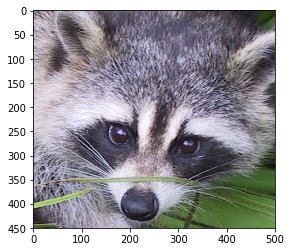

In [7]:
lx, ly = face.shape[0:2]#Devuelve las dimensiones de la imágen en pixeles (768x1024)
# Se hace de 0 a 2 porque se quiere solo las dimensiones y no las características de los colores
crop_face = face[50:500,400:900, :] # Se recorta la imagen en un cuadrado (asi como en photoshop)
# primera dimensión = eje y
# segunda dimensión = eje x
plt.imshow(crop_face)

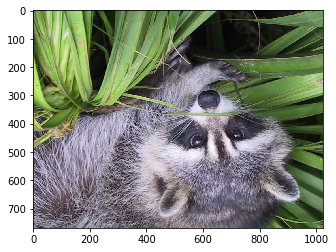

In [8]:
# Flip up - down
flip_ud_face = np.flipud(face) # Voltear la imagen
plt.imshow(flip_ud_face)


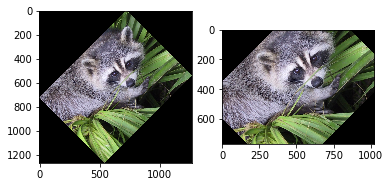

In [9]:
rotate_face = ndimage.rotate(face, 45) # Rotar la imágen 45° (se rota y se acomoda al tamaño)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False) # Recorta la imágen (conserva el tamaño)
plt.subplot(121)
plt.imshow(rotate_face)
plt.subplot(122)
plt.imshow(rotate_face_noreshape)

(-0.5, 1023.5, 767.5, -0.5)

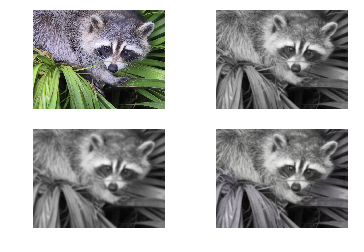

In [10]:
blurred_face = ndimage.gaussian_filter(face, sigma=3) # Filtro gaussiano (ponderación con respecto a la curva de Gauss)
# El filtro gaussiano se aplica en las tres dimensiones en este caso (tamaño x, tamaño y, y pixeles)
# por esta razón son grises
very_blurred_face = ndimage.gaussian_filter(face, sigma=5)
local_mean_face = ndimage.uniform_filter(face, size=11)
#El sigma dice que tan grande es la función de Gauss para filtrar

plt.subplot(221)
plt.imshow(face)
plt.axis('off')
plt.subplot(222)
plt.imshow(blurred_face)
plt.axis('off')
plt.subplot(223)
plt.imshow(very_blurred_face)
plt.axis('off')
plt.subplot(224)
plt.imshow(local_mean_face)
plt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

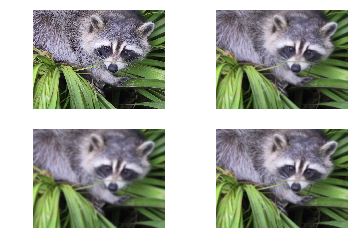

In [11]:
blurred_face = ndimage.gaussian_filter(face, sigma=(3, 3, 0))
very_blurred_face = ndimage.gaussian_filter(face, sigma=(5, 5, 0))
local_mean_face = ndimage.uniform_filter(face, size=(11, 11, 0))
 # se pone 1 para que salga gris y 0 para que salga en color
plt.subplot(221)
plt.imshow(face)
plt.axis('off')
plt.subplot(222)
plt.imshow(blurred_face)
plt.axis('off')
plt.subplot(223)
plt.imshow(very_blurred_face)
plt.axis('off')
plt.subplot(224)
plt.imshow(local_mean_face)
plt.axis('off')

In [12]:
from skimage import feature
# Una imagen es una matriz, que tiene el tamaño y la intensidad en números del color (algunas veces en RGB)

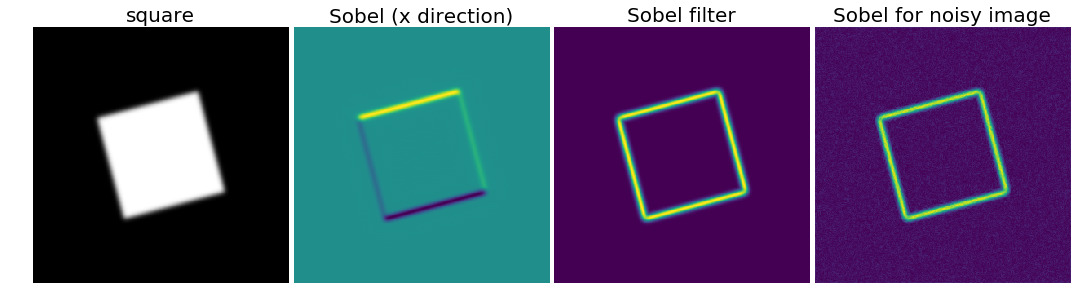

In [13]:
im = np.zeros((256, 256)) # Imagen a partir de ahora (todo en ceros sale una imagen negra)
im[64:-64, 64:-64] = 2 # El valor de 2 en este caso no importa porque es una imagen binaria
# Así, se dibuja un cuadrado con las coordenadas anteriores
im = ndimage.rotate(im, 15, mode='constant') # Se rota la imagen
im = ndimage.gaussian_filter(im, 3) # Se pone el filtro gaussiando (suaviza el borde) lo que hace que pasa al gris
# Sobel = calculá el gradiente de color de las imágenes (encuentra los cambios de colores para identificar los bordes)
sx = ndimage.sobel(im, axis=0, mode='constant')# Calcular gradiente en vector x
# axis = 0 (dirección y)
# axis = 1 (dirección x)
sy = ndimage.sobel(im, axis=1, mode='constant') #Calcular gradiente en vector y
sob = np.hypot(sx, sy) # Calcular la norma del gradiente

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)


im_noisy = im + 0.07*np.random.random(im.shape) # Se pone un ruido blanco

sx = ndimage.sobel(im_noisy, axis=0, mode='constant')
sy = ndimage.sobel(im_noisy, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)


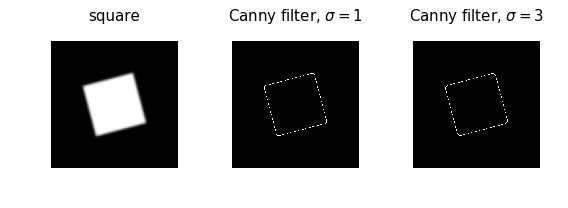

In [14]:
# Filtro canny
# En reconocimiento de imágenes, el filtro canny es el primer paso (se reconocen los bordes)
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)
# Sigma es un parámetro que controla el filtrado
# Transformada de Houfh: Se quieren detectar las líneas que están como puntos
# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('square', fontsize=15)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=15)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=15)

fig.tight_layout()

plt.show()


In [15]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)

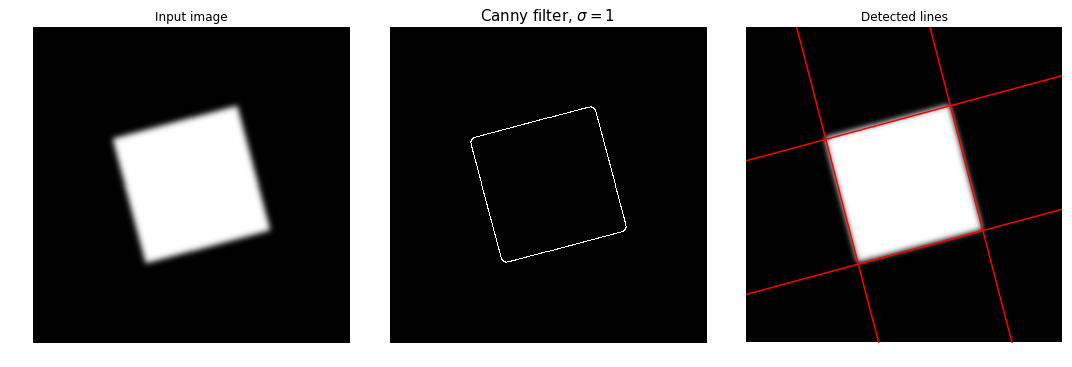

In [16]:
# El filtro de Canny bota una imágen binaria (o negra o blanca)
h, theta, d = hough_line(edges1) # Transformada de hough para encontrar lineas
# se ingresa la imágen del canny

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(im, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(edges1, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Canny filter, $\sigma=1$', fontsize=15)

ax[2].imshow(im, cmap=cm.gray) 
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - im.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, im.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, im.shape[1]))
ax[2].set_ylim((im.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')
plt.tight_layout()
plt.show()

<h2> <div style="text-align:center"> Ejercicio 1 </div> </h2>

In [112]:
Im1 = pylab.imread("ves_full_150_002.jpg")
vsa = Image.open("ves_full_150_002.jpg")
gray = vsa.convert('L')
bw = numpy.asarray(gray)
f1 = ndimage.gaussian_filter(bw, 1.8)
bordes = feature.canny(f1, sigma=3)

hough_radii = np.arange(210, 350, 2)
hough_res = hough_circle(bordes, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
centro_x = max(circx)-max(radii)
centro_y = max(circy)-max(radii)
    

Diámetro [píxeles] = 238
Centro [píxeles] = [280, 276]


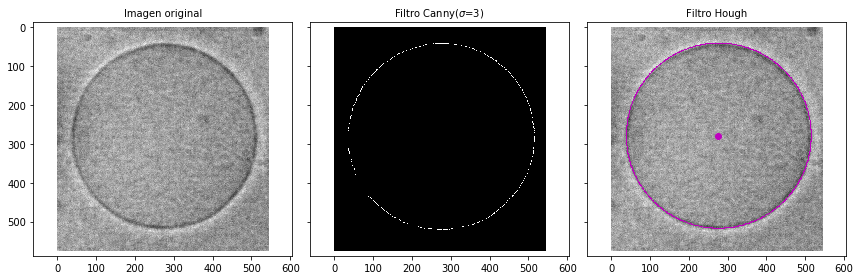

In [130]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),
                                    sharex=True, sharey=True)

ax1.imshow(Im1, cmap=plt.cm.gray)
ax1.set_title('Imagen original', fontsize=10)
ax2.imshow(bordes)
ax2.set_title('Filtro Canny($\sigma$=3)', fontsize=10)
ax3.imshow(Im1)
ax3.plot(circx,circy, ',m',lw=0.5)
ax3.plot(centro_x,centro_y,'om')
ax3.set_title('Filtro Hough', fontsize=10)
print(f'Diámetro [píxeles] = {max(radii)}')
print(f'Centro [píxeles] = {[centro_y, centro_x]}')

fig.tight_layout()
plt.show()